# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


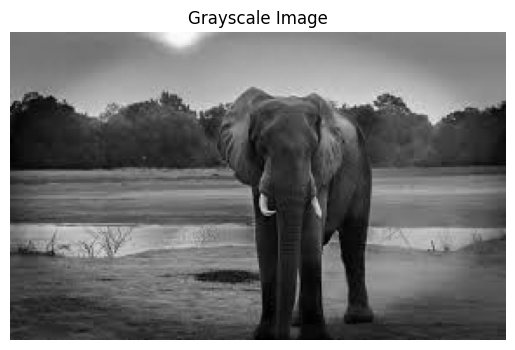

In [95]:
# Loading image

import cv2 # For loading image
import numpy as np
import matplotlib.pyplot as plt

img_bgr = cv2.imread("download.jpg")
img_rgb = cv2.cvtColor(img_bgr , cv2.COLOR_BGR2RGB) # Image convert to RGB
gray = cv2.cvtColor(img_rgb , cv2.COLOR_BGR2GRAY)  # Image convert to Grayscale Image

plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis("off")
plt.show()




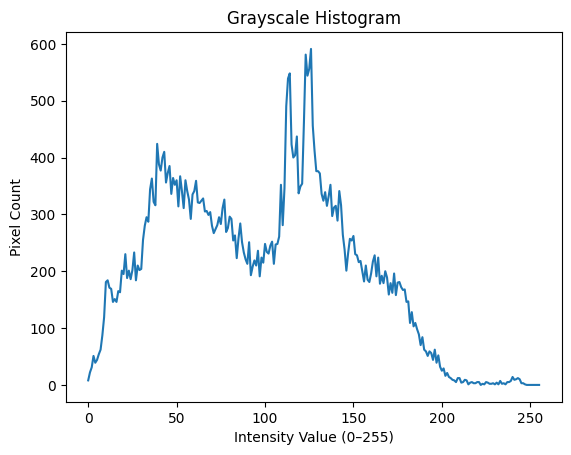

In [96]:
# 1 Grayscale Histogram

import numpy as np
import matplotlib.pyplot as plt

# Function for getting histogram
def gray_histogram(gray_img):
    histogram = np.zeros(256, dtype=int)
    rows, cols = gray_img.shape
    for i in range(rows):
        for j in range(cols):
            pixel_value = gray_img[i, j]
            histogram[pixel_value] += 1

    return histogram

# plot using matplotlib

hist = gray_histogram(gray)

plt.plot(hist)
plt.title("Grayscale Histogram")
plt.xlabel("Intensity Value (0–255)")
plt.ylabel("Pixel Count")

plt.show()


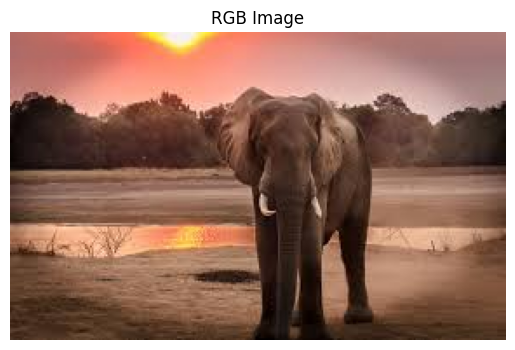

In [97]:
# 2 RGB Histogram

# Displaying RGB Image
plt.imshow(img_rgb)
plt.title('RGB Image')
plt.axis("off")
plt.show()



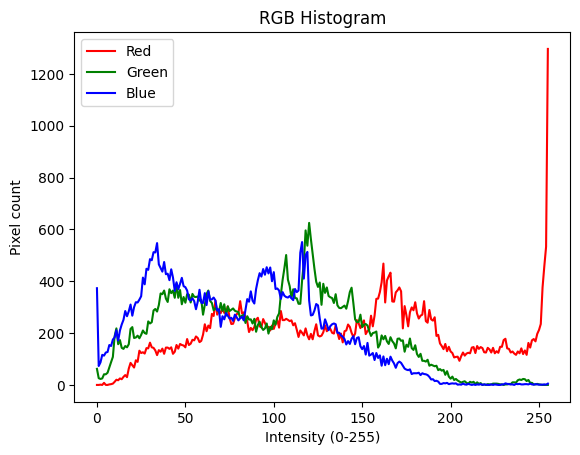

In [98]:
import numpy as np
import matplotlib.pyplot as plt

# function for RGB histogram
def rgb_histogram(img_rgb):
    hists = np.zeros((3, 256), dtype=np.int64)
    rows, cols, chans = img_rgb.shape
    assert chans == 3

    for i in range(rows):
        for j in range(cols):
            r, g, b = img_rgb[i, j]        # values 0..255 (uint8)
            hists[0, int(r)] += 1          # red
            hists[1, int(g)] += 1          # green
            hists[2, int(b)] += 1          # blue

    return hists


hist = rgb_histogram(img_rgb)

# plot using matplotlib

plt.plot(hist[0], color='r', label='Red')
plt.plot(hist[1], color='g', label='Green')
plt.plot(hist[2], color='b', label='Blue')
plt.xlabel('Intensity (0-255)')
plt.ylabel('Pixel count')
plt.title('RGB Histogram')
plt.legend()

plt.show()


## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

In [99]:
import numpy as np

def rgb_to_hsv(rgb_img):

    # Convert to float for calculations
    rgb = rgb_img.astype(np.float32)

    R = rgb[:, :, 0]
    G = rgb[:, :, 1]
    B = rgb[:, :, 2]

    # Max and min
    Cmax = np.max(rgb, axis=2)
    Cmin = np.min(rgb, axis=2)
    diff = Cmax - Cmin

    # Compute Hue
    H = np.zeros_like(Cmax)

    # Avoid division by zero
    mask = diff != 0

    # Case 1: max == R
    idx = (Cmax == R) & mask
    H[idx] = (60 * ((G[idx] - B[idx]) / diff[idx]) + 360) % 360

    # Case 2: max == G
    idx = (Cmax == G) & mask
    H[idx] = (60 * ((B[idx] - R[idx]) / diff[idx]) + 120) % 360

    # Case 3: max == B
    idx = (Cmax == B) & mask
    H[idx] = (60 * ((R[idx] - G[idx]) / diff[idx]) + 240) % 360

    # Saturation
    S = np.zeros_like(Cmax)
    nonzero_mask = Cmax != 0
    S[nonzero_mask] = (diff[nonzero_mask] / Cmax[nonzero_mask]) * 255

    # Value
    V = Cmax

    # Scale Hue from 0–360 to 0–179
    H = (H / 360) * 179

    hsv = np.stack([H, S, V], axis=2).astype(np.uint8)
    return hsv


In [100]:
# Load an Image
import cv2
import matplotlib.pyplot as plt

img_bgr = cv2.imread("download.jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)


In [101]:
# Calling Function
hsv_img = rgb_to_hsv(img_rgb)


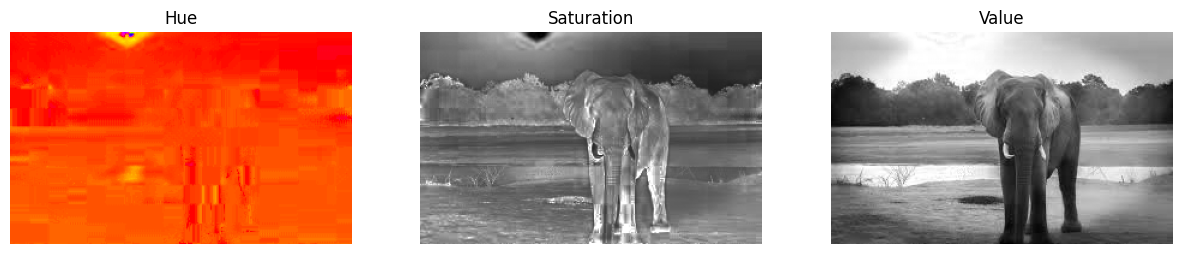

In [102]:
# Displaying hsv Image
H = hsv_img[:,:,0]
S = hsv_img[:,:,1]
V = hsv_img[:,:,2]

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(H, cmap='hsv')
plt.title("Hue")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(S, cmap='gray')
plt.title("Saturation")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(V, cmap='gray')
plt.title("Value")
plt.axis('off')

plt.show()


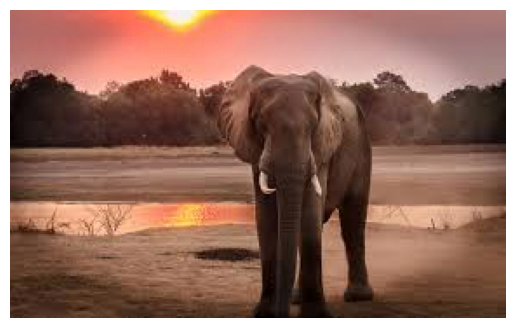

In [103]:
# RGB from hsv
rgb_from_hsv = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB)
plt.imshow(rgb_from_hsv)
plt.axis("off")
plt.show()


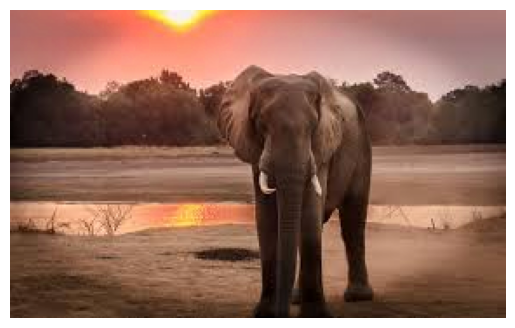

In [104]:
# Test it by using cv2.cvtColor
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
img_rgb_from_hsv = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
plt.imshow(img_rgb_from_hsv)
plt.axis("off")
plt.show()

In [105]:
# both are looking like similar image

In [106]:
# I searched for formulas and reasons
"""RGB represents colors in a cube shape, while HSV represents colors in a hexacone.
The top of the cone is black, and the bottom hexagon has 6 points:
Red → Yellow → Green → Cyan → Blue → Magenta.

V (Value) = max(R,G,B)
Because brightness comes from the strongest channel.

S (Saturation) = (max - min) / max
This measures distance from the grayscale axis. If all three channels are equal → the color is gray → S = 0.

Hue:
The hue angle depends on which channel is the maximum.
Each primary color lies in a different 60° sector of the hexagon, so the formula changes piecewise.
We normalize the angular value to 0–360, then convert it to 0–255 scale.

Overall:
These formulas map the RGB cube into the perceptually meaningful HSV hexacone."""


'RGB represents colors in a cube shape, while HSV represents colors in a hexacone.\nThe top of the cone is black, and the bottom hexagon has 6 points:\nRed → Yellow → Green → Cyan → Blue → Magenta.\n\nV (Value) = max(R,G,B)\nBecause brightness comes from the strongest channel.\n\nS (Saturation) = (max - min) / max\nThis measures distance from the grayscale axis. If all three channels are equal → the color is gray → S = 0.\n\nHue:\nThe hue angle depends on which channel is the maximum.\nEach primary color lies in a different 60° sector of the hexagon, so the formula changes piecewise.\nWe normalize the angular value to 0–360, then convert it to 0–255 scale.\n\nOverall:\nThese formulas map the RGB cube into the perceptually meaningful HSV hexacone.'

## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

In [107]:
# 1 Filter Frosted rumor
import numpy as np
import cv2
import matplotlib.pyplot as plt

def frosted_rumor(img_rgb, tint_strength=0.25, contrast=1.08, sat_scale=0.85, gamma=1.05):

    # Defensive copy + dtype
    img = np.clip(img_rgb, 0, 255).astype(np.float32)

    # 1 Contrast
    img = (img - 128.0) * contrast + 128.0
    img = np.clip(img, 0, 255)

    # 2 Gamma correction
    # gamma > 1 darkens midtones a bit (gives moody look), <1 brightens
    inv_gamma = 1.0 / gamma
    # normalize to 0..1, apply gamma, scale back
    img = ((img / 255.0) ** inv_gamma) * 255.0
    img = np.clip(img, 0, 255)

    # 3 Reduce saturation in HSV
    bgr = cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_RGB2BGR)
    hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV).astype(np.float32)
    hsv[...,1] = hsv[...,1] * sat_scale  # saturation scale
    hsv[...,1] = np.clip(hsv[...,1], 0, 255)
    bgr_desat = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2BGR)
    img = cv2.cvtColor(bgr_desat, cv2.COLOR_BGR2RGB).astype(np.float32)

    # 4 Cool blue tint blended by luminance mask
    lum = 0.299*img[...,0] + 0.587*img[...,1] + 0.114*img[...,2]  # 0..255
    # normalize luminance to 0..1
    lum_norm = lum / 255.0
    # mask: darker areas get more tint, brighter areas less (foggy effect)
    mask = (1.0 - lum_norm)  # 1 for dark, 0 for bright
    mask = np.expand_dims(mask, axis=2)  # HxWx1

    # create blue tint color (use cool teal-blue)
    blue_tint = np.array([190.0, 220.0, 255.0], dtype=np.float32)  # RGB
    # blend: out = img * (1 - tint_strength*mask) + blue_tint * (tint_strength*mask)
    blend = mask * tint_strength
    out = img * (1.0 - blend) + blue_tint.reshape((1,1,3)) * blend
    out = np.clip(out, 0, 255).astype(np.uint8)
    return out

# Display helper for Filter 1
def demo_frosted_rumor(img_rgb):
    out = frosted_rumor(img_rgb)
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1); plt.imshow(img_rgb); plt.title("Original"); plt.axis('off')
    plt.subplot(1,2,2); plt.imshow(out); plt.title("FrostedRumor (cool fog)"); plt.axis('off')
    plt.show()


In [108]:
import cv2
img_bgr = cv2.imread('download (7).jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)


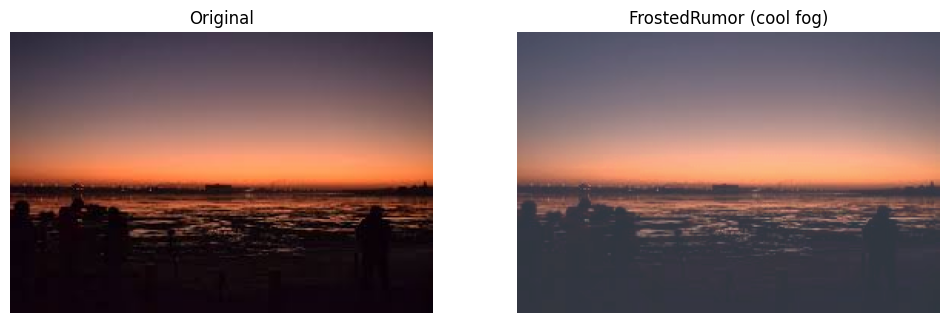

In [109]:
# Filter 1 demo
demo_frosted_rumor(img_rgb)


In [110]:
# I chose cool tint + desaturation and gamma to produce a moody, foggy atmosphere.
# Works well on coastal/river/urban dusk photos where adding a chilly mood increases visual drama.

In [111]:
# 2 Filter Sun sizzle
import numpy as np
import cv2
import matplotlib.pyplot as plt

def sun_sizzle(img_rgb, warmth=0.6, contrast=1.12, vibrance=1.15, highlight_tint_strength=0.25, shadow_tint_strength=0.15):

    img = np.clip(img_rgb, 0, 255).astype(np.float32)

    # 1 Contrast (scale about 128)
    img = (img - 128.0) * contrast + 128.0
    img = np.clip(img, 0, 255)

    # 2 Luminance mask
    lum = 0.299*img[...,0] + 0.587*img[...,1] + 0.114*img[...,2]  # 0..255
    lum_norm = lum / 255.0

    # highlight mask and shadow mask
    highlight_mask = np.clip((lum_norm - 0.45)/0.55, 0.0, 1.0)  # stronger above midtones
    shadow_mask = np.clip((0.55 - lum_norm)/0.55, 0.0, 1.0)    # stronger below midtones
    highlight_mask = np.expand_dims(highlight_mask, axis=2)
    shadow_mask = np.expand_dims(shadow_mask, axis=2)

    # 3 split-tone colors
    # choose warm orange for highlights and teal for shadows
    warm = np.array([255.0, 180.0, 90.0], dtype=np.float32)   # warm highlight RGB
    cool = np.array([80.0, 170.0, 200.0], dtype=np.float32)   # cool shadow RGB
    # apply tint blended by mask and strength param
    # Allow warmth param to scale how strong the highlight tint is
    out = img.copy()
    out = out * (1.0 - highlight_mask * highlight_tint_strength) + warm.reshape((1,1,3)) * (highlight_mask * highlight_tint_strength * warmth)
    out = out * (1.0 - shadow_mask * shadow_tint_strength) + cool.reshape((1,1,3)) * (shadow_mask * shadow_tint_strength * (1.0 - warmth))
    out = np.clip(out, 0, 255)

    # 4 Vibrance-like saturation boost
    # Convert to HSV
    bgr_tmp = cv2.cvtColor(out.astype(np.uint8), cv2.COLOR_RGB2BGR)
    hsv = cv2.cvtColor(bgr_tmp, cv2.COLOR_BGR2HSV).astype(np.float32)
    Hch = hsv[...,1]  # saturation channel
    # Vibrance: increase saturation more where saturation is low-to-mid, less where already saturated
    # map s in [0,255] to factor around 1..vibrance
    s_norm = Hch / 255.0
    vibrance_factor = 1.0 + (vibrance - 1.0) * (1.0 - s_norm)  # more boost to low s
    hsv[...,1] = np.clip(hsv[...,1] * vibrance_factor, 0, 255)

    # 5 optional small hue rotate for warmth > 0.5
    if warmth > 0.5:
        # small hue rotation in degrees; convert OpenCV H units (0..179) to deg
        hue_rot_deg = (warmth - 0.5) * 12.0  # up to ~6-12 deg hue shift
        # convert to OpenCV units (0..179)
        hue_rot_units = hue_rot_deg * (179.0/360.0)
        hsv[...,0] = (hsv[...,0] + hue_rot_units) % 179.0

    bgr_out = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2BGR)
    out_rgb = cv2.cvtColor(bgr_out, cv2.COLOR_BGR2RGB)
    return out_rgb.astype(np.uint8)

# Display helper for SunSizzle
def demo_sun_sizzle(img_rgb):
    out = sun_sizzle(img_rgb)
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1); plt.imshow(img_rgb); plt.title("Original"); plt.axis('off')
    plt.subplot(1,2,2); plt.imshow(out); plt.title("SunSizzle (warm split-tone)"); plt.axis('off')
    plt.show()


In [112]:
import cv2
img_bgr = cv2.imread('images (1).jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)


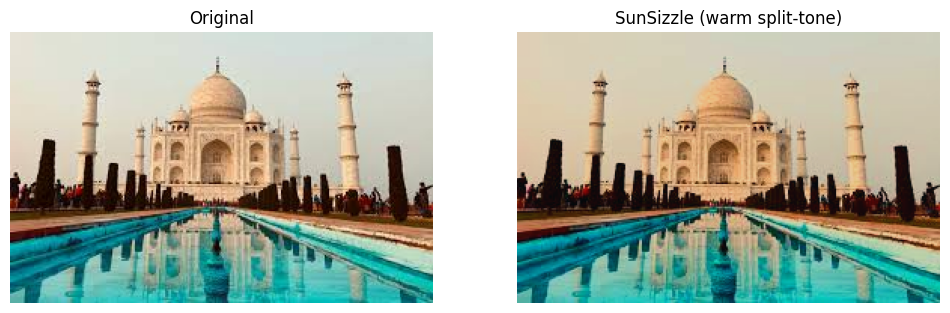

In [113]:
# Filter 2 demo
demo_sun_sizzle(img_rgb)


In [114]:
# chose split-toning (warm highlights, cool shadows) to create a pleasing golden-hour vibe while protecting shadow detail;
# vibrance increases color punch where it helps most (midtones and skin) without oversaturating skies.

## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

In [115]:
import cv2
import matplotlib.pyplot as plt

img_bgr = cv2.imread("images (2).jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

In [116]:
import numpy as np

def white_patch_balance(img_rgb):
  # Seperating channels in RGB image
  r = img_rgb[:,:,0].astype(np.float32)
  g = img_rgb[:,:,1].astype(np.float32)
  b = img_rgb[:,:,2].astype(np.float32)

  # Getting a single intensity array described by weighted formula good for human perception
  intensity = 0.299*r + 0.587*g + 0.114*b
  # Getting index of maximum intensity i.e. most white pixel in image
  y, x = np.unravel_index(np.argmax(intensity), intensity.shape)

  # Storing brightest pixel
  r_max = img_rgb[y, x, 0]
  g_max = img_rgb[y, x, 1]
  b_max = img_rgb[y, x, 2]

  # Finding Scaling Factor
  scale_r = 255.0 / r_max
  scale_g = 255.0 / g_max
  scale_b = 255.0 / b_max

  # Scaling
  r_ = r * scale_r
  g_ = g * scale_g
  b_ = b * scale_b

  # Clipping and DataType conversion
  r_ = np.clip(r_, 0, 255).astype(np.uint8)
  g_ = np.clip(g_, 0, 255).astype(np.uint8)
  b_ = np.clip(b_, 0, 255).astype(np.uint8)

  # Creating final white-patch balanced image
  img_wb = np.zeros_like(img_rgb, dtype=np.uint8)
  img_wb[:,:,0] = r_
  img_wb[:,:,1] = g_
  img_wb[:,:,2] = b_

  return img_wb

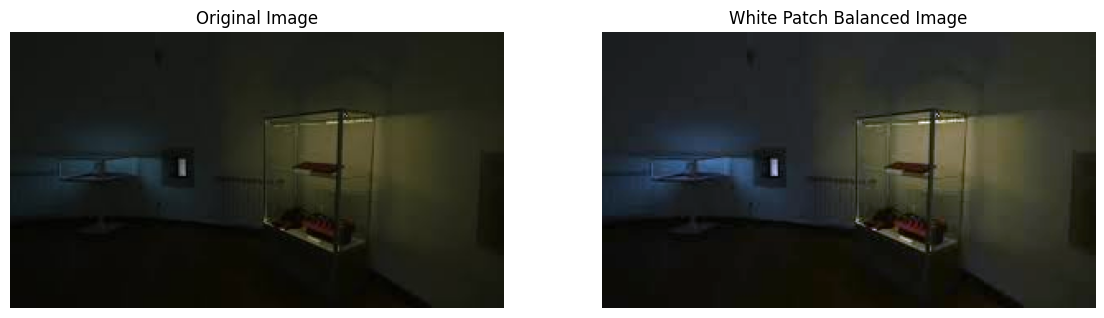

In [117]:
# Compute white-patch balanced image
img_wb = white_patch_balance(img_rgb)

# Plot side-by-side
plt.figure(figsize=(14,7))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_wb)
plt.title("White Patch Balanced Image")
plt.axis("off")

plt.show()

## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

In [118]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def white_balance(img_rgb, value, method='lab'):

    if not (0.0 <= value <= 1.0):
        raise ValueError("value must be in [0,1]")
    if img_rgb.dtype != np.uint8:
        # ensure expected dtype
        img = np.clip(img_rgb, 0, 255).astype(np.uint8)
    else:
        img = img_rgb.copy()

    # signed slider in [-1,1]
    s = (value - 0.5) * 2.0

    # Early exit: if s == 0 return original
    if abs(s) < 1e-6:
        return img.copy()

    # Convert RGB -> BGR for OpenCV
    img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    #1 LAB chroma shift
    # Convert to LAB (OpenCV uses L,a,b in 0..255 for uint8 input)
    lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB).astype(np.float32)

    # OpenCV LAB centers a,b around 128. We add/subtract offsets to push color.
    # Tune these deltas to taste:
    delta_a = 15.0   # affects green<->red
    delta_b = 20.0   # affects blue<->yellow (temperature)
    # When s>0 we warm: add to a and b; when s<0 we cool: subtract.
    lab[..., 1] = lab[..., 1] + (s * delta_a)
    lab[..., 2] = lab[..., 2] + (s * delta_b)

    # Clip safe range 0..255
    lab[..., 1] = np.clip(lab[..., 1], 0, 255)
    lab[..., 2] = np.clip(lab[..., 2], 0, 255)

    # Convert back to BGR
    bgr_from_lab = cv2.cvtColor(lab.astype(np.uint8), cv2.COLOR_LAB2BGR)

    # 2 Saturation tweak in HSV
    # Convert to HSV to scale saturation slightly depending on |s|
    hsv = cv2.cvtColor(bgr_from_lab, cv2.COLOR_BGR2HSV).astype(np.float32)
    # scale factor: make warm images slightly more saturated; cold images slightly less
    sat_scale = 1.0 + (abs(s) * 0.35) * (1 if s > 0 else -0.25)
    # clamp sat_scale reasonable (avoid negative)
    sat_scale = max(0.3, min(sat_scale, 2.0))
    hsv[..., 1] = hsv[..., 1] * sat_scale
    hsv[..., 1] = np.clip(hsv[..., 1], 0, 255)

    # Convert back to BGR and then RGB
    bgr_final = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2BGR)
    rgb_final = cv2.cvtColor(bgr_final, cv2.COLOR_BGR2RGB)

    # 3 Gentle per-channel scaling to enhance warmth/coolness
    # Apply small R/B scaling to emphasize temperature
    r_scale = 1.0 + (s * 0.08)   # up to ±8% change
    b_scale = 1.0 - (s * 0.08)
    # Compose final with float calc then clip
    rgb_f = rgb_final.astype(np.float32)
    rgb_f[..., 0] = np.clip(rgb_f[..., 0] * r_scale, 0, 255)  # R
    rgb_f[..., 2] = np.clip(rgb_f[..., 2] * b_scale, 0, 255)  # B

    out = rgb_f.astype(np.uint8)
    return out


# quick visual test
def show_white_balance_demo(img_rgb):
    # Show original and three sampled slider values
    vals = [0.0, 0.25, 0.5, 0.75, 1.0]
    plt.figure(figsize=(16,6))
    for i, v in enumerate(vals):
        out = white_balance(img_rgb, v)
        plt.subplot(1, len(vals), i+1)
        plt.imshow(out)
        plt.title(f"v={v:.2f}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


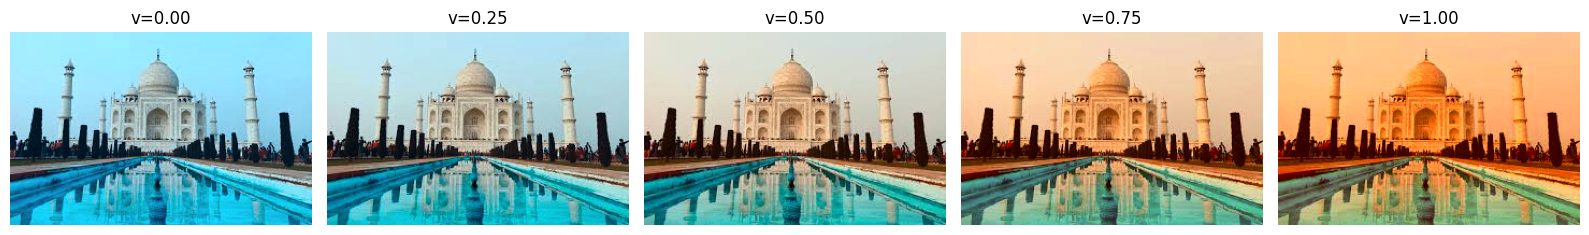

In [119]:
import cv2
img_bgr = cv2.imread("images.jpg")                # BGR
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    # RGB

out = white_balance(img_rgb, 0.2)   # cold
out = white_balance(img_rgb, 0.5)   # original
out = white_balance(img_rgb, 0.9)   # warm

# Show example
show_white_balance_demo(img_rgb)
